<a href="https://colab.research.google.com/github/Raghad770/board-game/blob/main/Copy_of_random_forest_regression_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

## Importing the libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

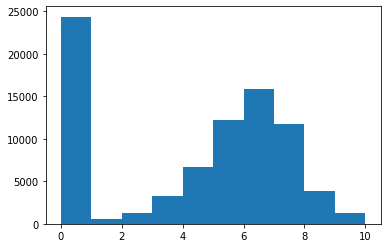

In [30]:
dataset = pd.read_csv('games.csv')

dataset.drop('type',inplace=True,axis=1)
dataset.drop('name',inplace=True,axis=1)
dataset.drop('id',inplace=True,axis=1)
dataset.drop("bayes_average_rating",inplace=True,axis=1)
plt.hist(dataset["average_rating"])

# Show the plot.
plt.show()

y = dataset.loc[:,"average_rating" ].values
dataset.drop("average_rating",inplace=True,axis=1)
X=dataset.iloc[:,:]

In [31]:
print(X)
print(y)

       yearpublished  minplayers  ...  total_weights  average_weight
0             2005.0         2.0  ...           2562          3.4785
1             2012.0         2.0  ...           1423          3.8939
2             2013.0         1.0  ...            777          3.7761
3             2006.0         2.0  ...           1642          4.1590
4             2002.0         2.0  ...           5213          3.2943
...              ...         ...  ...            ...             ...
81307         2015.0         1.0  ...              0          0.0000
81308         2013.0         2.0  ...              0          0.0000
81309         2015.0         2.0  ...              0          0.0000
81310         2015.0         2.0  ...              0          0.0000
81311         2010.0         1.0  ...              0          0.0000

[81312 rows x 15 columns]
[8.34 8.29 8.29 ... 0.   0.   0.  ]


In [32]:
from sklearn.impute import SimpleImputer
shape=dataset.shape
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
print(X)

[[2.00e+03 2.00e+00 2.00e+00 ... 5.35e+03 2.56e+03 3.48e+00]
 [2.01e+03 2.00e+00 5.00e+00 ... 2.53e+03 1.42e+03 3.89e+00]
 [2.01e+03 1.00e+00 7.00e+00 ... 1.70e+03 7.77e+02 3.78e+00]
 ...
 [2.02e+03 2.00e+00 1.50e+01 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.02e+03 2.00e+00 4.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.01e+03 1.00e+00 6.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]]


## Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting the Test set results

In [35]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4.73 4.  ]
 [6.31 5.38]
 [0.   0.  ]
 ...
 [5.22 1.5 ]
 [3.   3.  ]
 [5.05 5.53]]


In [36]:
y_single_pred=regressor.predict(X_test[[0]])

## Evaluating the Model Performance

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8881192692399998